### Imports

In [407]:
# -*- coding: utf-8 -*-
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans, DBSCAN
from unidecode import unidecode
import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import euclidean_distances,cosine_distances

In [408]:
nltk.download("stopwords")
stop_words_es = set(stopwords.words('spanish'))
stemmer = SnowballStemmer("spanish")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\magda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Cargar el Dataset 

Usamos 300000 datos por mientras.

In [409]:
df = pd.read_csv('20231007200103_query_results.csv',encoding="utf-8" , nrows=500000)

#### Limpiamos un poquito los datos. Falta harta limpieza todavía.

In [410]:

corpus = df['agileoffereditemsdescripcionofertada'].apply(lambda x: unidecode(x).lower())
corpus = corpus.unique()

#corpus = [palabra for palabra in corpus if palabra not in stop_words_es]

### Crear espacio vectorial

In [411]:
# Initialize and fit CountVectorizer
vectorizer = CountVectorizer()
vectorized_data = vectorizer.fit_transform(corpus) 
#df['vectorized_data'] = vectorized_data
print(type(vectorized_data))

<class 'scipy.sparse._csr.csr_matrix'>


### Funciones útiles

In [412]:
def generate_vector(str):
    # Initialize the CountVectorizer
    # Tokenize and vectorize the text
    vector = vectorizer.transform([str])

    # Convert the result to a dense array for inspection
    vector_array = vector.toarray().flatten()
    #print(vector_array.shape)
    return vector_array


def plot_vector(vector):
    fig,ax = plt.subplots(figsize= (4,3))
    #print(vector_array.flatten().shape)
    x = np.linspace(0,len(vector),len(vector))
    ax.bar(x,vector)
    plt.show()
    #vector_array.shape

def elbow(interval:list, data):
    pass


def tsne(data):
    pass

### Reducción de dimensionalidad con TSNE

In [413]:
# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(vectorized_data.toarray())

## Kmeans sobre TSNE 

#### (elbow method)

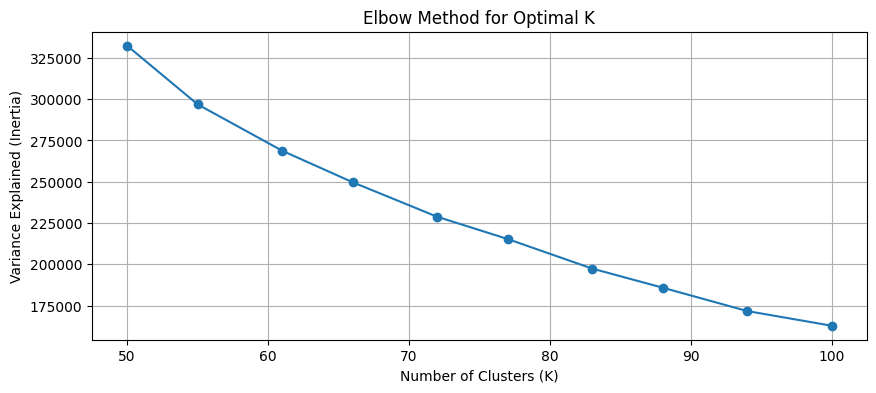

In [414]:

#print(string_vectors)
n_features = 2
n_clusters_range = np.linspace(50, 100,10, dtype=int)  # Range of cluster numbers to try

# Initialize an empty list to store the variance explained by each cluster
inertia = []

# Perform K-Means clustering for different values of k
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters,n_init=5,random_state=42)
    kmeans.fit(tsne_data)
    inertia.append(kmeans.inertia_)

# Create the Elbow Method graph
plt.figure(figsize=(10, 4))
plt.plot(n_clusters_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Variance Explained (Inertia)')
plt.grid(True)
plt.show()

#### Kmeans

c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


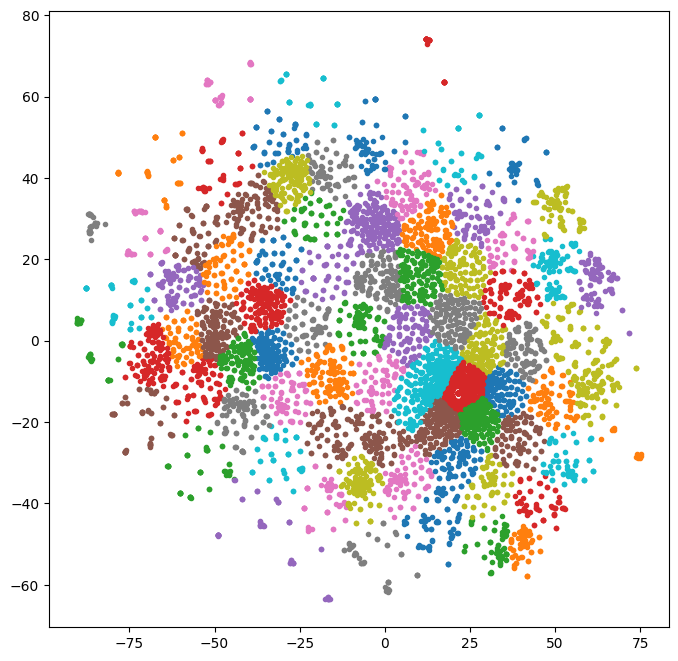

In [432]:
def launch_kmeans(n_clusters,data, print_clusters = False):

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_assignments = kmeans.fit_predict(data)
    #cluster_assignments
    # Create a scatter plot with different colors for each cluster


    fig,ax = plt.subplots(figsize=(8, 8))
    for i in range(n_clusters):
        ax.scatter(data[cluster_assignments == i, 0], data[cluster_assignments == i, 1], label=f'Cluster {i}', marker= '.')

    #plt.legend()
    plt.show()


    # Create a DataFrame to associate original strings with clusters
    data_with_clusters = pd.DataFrame({'Text': corpus, 'Cluster': cluster_assignments})
    if print_clusters:
        for cluster in range(kmeans.n_clusters):
            cluster_data = data_with_clusters[data_with_clusters['Cluster'] == cluster]
            print(f"Cluster {cluster}:")
            for original_text in cluster_data['Text']:
                print(original_text)
    return data_with_clusters

kmeans_clusters = launch_kmeans(n_clusters= 80, data =tsne_data)

## DBSCAN sobre TSNE

### (knee method)

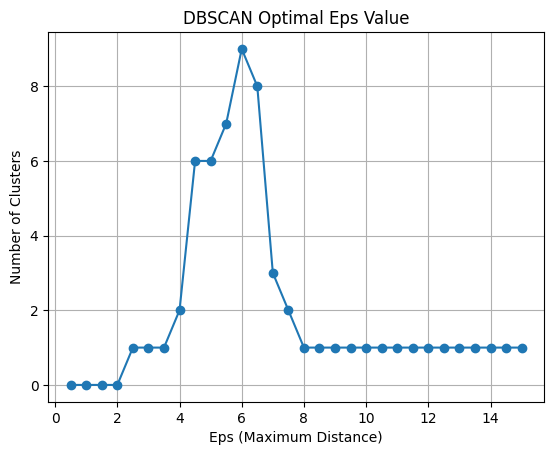

9


In [416]:
# Initialize lists to store results
eps_values = np.linspace(0.5, 15.0, num=30)  # Adjust the range and step as needed
num_clusters = []

# Test different values of eps
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=80)
    cluster_assignments = dbscan.fit_predict(tsne_data)
    num_clusters.append(len(set(cluster_assignments)) - 1)  # Subtract 1 for the noise cluster

# Plot the number of clusters vs. eps values
plt.plot(eps_values, num_clusters, marker='o')
plt.xlabel('Eps (Maximum Distance)')
plt.ylabel('Number of Clusters')
plt.title('DBSCAN Optimal Eps Value')
plt.grid(True)
plt.show()

print(max(num_clusters))


In [417]:
### implementar gridsearch para hyperparam de dbscan

### DBSCAN

c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


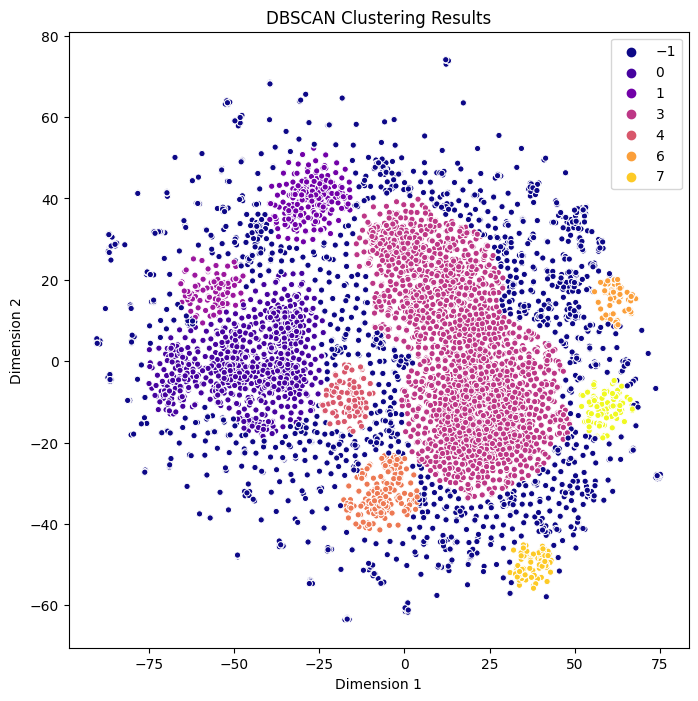

In [418]:
def launch_dbscan():
    dbscan = DBSCAN(eps=6, min_samples=80)
    cluster_assignments = dbscan.fit_predict(tsne_data)
    data_with_clusters = pd.DataFrame({'Text': corpus, 'Cluster': cluster_assignments})
    #data_with_clusters = data_with_clusters[data_with_clusters['Cluster'] >=0]
    #display(data_with_clusters)
    #sns.set(style='darkgrid')
    plt.figure(figsize=(8,8 ))
    sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=cluster_assignments, s=80,marker = '.',palette='plasma',)
    plt.title('DBSCAN Clustering Results')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')

    plt.show()
    return data_with_clusters

dbscan_clusters = launch_dbscan()

## Estudiando los strings en cada cluster

### (dbscan)

In [419]:
num_clusters =10 
for cluster in range(num_clusters):
    cluster_data = data_with_clusters[data_with_clusters['Cluster'] == cluster]
    print(f"Cluster {cluster}:")
    for original_text in cluster_data['Text']:
        print(original_text)

Cluster 0:
productos entregados en direccion indicada, sin costo y en el plazo de 2 dias habiles.|
segun cotizacion adjunta. |plazo de entrega: 3-5 dias habiles una vez aceptada la oc (despacho gratuito)
despacho 3 dias habiles
entrega en 2 dias.
plazo de entrega 2 dias, despacho gratuito
modelos solicitados|entrega 5 dias
detalles en archivo adjunto - entrega: 5 dias (despacho gratis)
modelos solicictados entrega 3 dias
flete incl. en 5 dias habiles |
taburete apoya brazo base metalica machtig, opcion con ficha tecnica adjunta para ser evaluada.||despacho incluido en 6 dias habiles desde aceptada oc.||vendedor: sebastian vera.|fono: 412921104.|concepcion.
cotizacion por 4 unidades de webcam kinscoter fhd con microfono incluido y rotacion 360deg. 10 unidades de pendrive kingston 128 g exodia 3.2. disponibilidad inmediata y despacho sin costo en 2 dias habiles una vez recibida oc.
entrega 3 - 4 dias envio gratis 
entrega 4-3 dias envio gratis -contacto +56999304809
entrega en 2 dias hab

### Volviendo al dataset

Asignar a la data original su cluster

In [433]:
kmeans_clusters.rename(columns={'Text': 'agileoffereditemsdescripcionofertada'}, inplace=True)
#data_with_clusters = data_with_clusters[data_with_clusters['Cluster']>=0]
df['agileoffereditemsdescripcionofertada'] = df['agileoffereditemsdescripcionofertada'].apply(lambda x:  unidecode(x).lower())
gg= df.merge(kmeans_clusters, on='agileoffereditemsdescripcionofertada', how='left')
#gg = gg[gg['Cluster'] >=0]
#display(gg) 

display(gg)

,organismosolicitante,agilebuyingscode,agilebuyingsdescription,agilebuyingsstatus,agilebuyingscurrency,agilebuyingsavailableamount,agileitemsname,agileitemsmp_id,agileitemsproductcategory,agileoffereditemsproductoofertado,agileoffereditemscategoriaofertada,agileoffereditemsdescripcionofertada,agileoffereditemspreciototal,taxnumberprovider,provideractivity,adjudicada,Cluster
0,61.608.502-6,1057501-2964-COT23,SE SOLICITA AGREGAR FICHA TÉCNICA DE LO OFERTA...,OC Emitida,$,1873450.0,Agujas de biopsia,42142504,Equipamiento y suministros médicos / Suministr...,Agujas de biopsia,Equipamiento y suministros médicos / Suministr...,corca1815b aguja de biopsia de partes blandas ...,30.0,96.515.660-7,VENTA AL POR MAYOR DE OTROS PRODUCTOS N.C.P.| ...,False,4
1,61.608.502-6,1057501-2964-COT23,SE SOLICITA AGREGAR FICHA TÉCNICA DE LO OFERTA...,OC Emitida,$,1873450.0,Agujas de biopsia,42142504,Equipamiento y suministros médicos / Suministr...,Agujas de biopsia,Equipamiento y suministros médicos / Suministr...,corca1815b aguja de biopsia de partes blandas ...,30.0,96.515.660-7,VENTA AL POR MAYOR DE OTROS PRODUCTOS N.C.P.| ...,False,4
2,61.608.502-6,1057501-2964-COT23,SE SOLICITA AGREGAR FICHA TÉCNICA DE LO OFERTA...,OC Emitida,$,1873450.0,Agujas de biopsia,42142504,Equipamiento y suministros médicos / Suministr...,Agujas de biopsia,Equipamiento y suministros médicos / Suministr...,corca1815b aguja de biopsia de partes blandas ...,30.0,96.515.660-7,VENTA AL POR MAYOR DE OTROS PRODUCTOS N.C.P.| ...,False,4
3,61.608.502-6,1057501-2964-COT23,SE SOLICITA AGREGAR FICHA TÉCNICA DE LO OFERTA...,OC Emitida,$,1873450.0,Agujas de biopsia,42142504,Equipamiento y suministros médicos / Suministr...,Agujas de biopsia,Equipamiento y suministros médicos / Suministr...,corca1815b aguja de biopsia de partes blandas ...,30.0,96.515.660-7,VENTA AL POR MAYOR DE OTROS PRODUCTOS N.C.P.| ...,False,4
4,70.885.500-6,1208069-35-COT23,INSUMOS DENTALES ESPECIALIDAD ENDODONCIA,OC Emitida,CLP,1156000.0,Cuñas o sets odontológicos,42151663,Equipamiento y suministros médicos / Equipos y...,Cuñas o sets odontológicos,Equipamiento y suministros médicos / Equipos y...,medicaltek chile s.a,10680.0,96.696.000-0,"VENTA AL POR MAYOR DE ARTICULOS DE PERFUMERIA,...",True,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,61.608.102-0,1058090-52-COT23,BUPRENORFINA 35 MCG/HR PARCHES,OC Emitida,$,250000.0,Clorhidrato de buprenorfina,51142215,Medicamentos y productos farmacéuticos / Medic...,Clorhidrato de buprenorfina,Analgésicos narcóticos,|buprenorfina 35 mcg/hr parches,260520.0,76.031.071-9,Farmacia,False,53
499996,61.608.102-0,1058090-52-COT23,BUPRENORFINA 35 MCG/HR PARCHES,OC Emitida,$,250000.0,Clorhidrato de buprenorfina,51142215,Medicamentos y productos farmacéuticos / Medic...,Clorhidrato de buprenorfina,Analgésicos narcóticos,|buprenorfina 35 mcg/hr parches,260520.0,76.031.071-9,Farmacia,False,53
499997,61.608.102-0,1058090-52-COT23,BUPRENORFINA 35 MCG/HR PARCHES,OC Emitida,$,250000.0,Clorhidrato de buprenorfina,51142215,Medicamentos y productos farmacéuticos / Medic...,Clorhidrato de buprenorfina,Analgésicos narcóticos,|buprenorfina 35 mcg/hr parches,260520.0,76.031.071-9,Farmacia,False,53
499998,61.608.102-0,1058090-52-COT23,BUPRENORFINA 35 MCG/HR PARCHES,OC Emitida,$,250000.0,Clorhidrato de buprenorfina,51142215,Medicamentos y productos farmacéuticos / Medic...,Clorhidrato de buprenorfina,Analgésicos narcóticos,|buprenorfina 35 mcg/hr parches,260520.0,76.031.071-9,Farmacia,False,53


In [434]:
df.groupby('taxnumberprovider').count().sort_values(by = 'organismosolicitante', ascending=False)

,organismosolicitante,agilebuyingscode,agilebuyingsdescription,agilebuyingsstatus,agilebuyingscurrency,agilebuyingsavailableamount,agileitemsname,agileitemsmp_id,agileitemsproductcategory,agileoffereditemsproductoofertado,agileoffereditemscategoriaofertada,agileoffereditemsdescripcionofertada,agileoffereditemspreciototal,provideractivity,adjudicada
taxnumberprovider,,,,,,,,,,,,,,,
96.556.940-5,10880,10880,10880,10880,10880,10880,10880,10880,10816,10880,10880,10880,10880,10880,10880
77.765.630-9,9680,9680,9680,9680,9680,9680,9680,9680,9648,9680,9680,9680,9680,9680,9680
96.670.840-9,7536,7536,7536,7536,7536,7536,7536,7536,7504,7536,7536,7536,7536,7536,7536
77.012.870-6,6784,6784,6784,6784,6784,6784,6784,6784,6784,6784,6784,6784,6784,6784,6784
76.462.500-5,5664,5664,5664,5664,5664,5664,5664,5664,5632,5664,5664,5664,5664,5664,5664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76.567.318-6,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
76.567.561-8,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
77.663.477-8,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16


Por ejemplo tomamos el usuario con más licitaciones respondidas.

In [435]:
def predict_user_item_cluster(df,items_to_consider):
    ten = df['agileoffereditemsdescripcionofertada'].unique()[:45]
    ten = " ".join(ten).lower()
    vectorized_ten = generate_vector(ten)
    distances = euclidean_distances(vectorized_ten.reshape(1,-1), vectorized_data)
    nearest_core_point_cluster = cluster_assignments[distances.argmin()]
    print(f"Unseen data point belongs to cluster {nearest_core_point_cluster}")
    return nearest_core_point_cluster

In [436]:
example_user_df = df.query(f'taxnumberprovider == "76.567.318-6" and adjudicada == True' ) #no es necesario que la licitacion este adjudicada, pero aquí probamos con licitaciones adjudicadas
predict_user_item_cluster(example_user_df,items_to_consider=45)

Unseen data point belongs to cluster 3


3

Para un cliente aleatorio:

In [440]:
random_client = df.sample(n=1)['taxnumberprovider']
random_client = str(random_client.values[0])
random_client_df = df.query(f'taxnumberprovider == "{random_client}"')  
predict_user_item_cluster(random_client_df,items_to_consider=15)


Unseen data point belongs to cluster -1


-1

## interactive plot

work in progress. Es pura visualizacion asi que no es importante por ahora.

In [425]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interactive

# Generate sample data
np.random.seed(42)
x = np.random.rand(100)
y = np.random.rand(100)


In [426]:

# Create a scatter plot function with a marker size parameter
def scatter_plot(marker_size,marker_size_2):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, s=marker_size)
    plt.title(f'Scatter Plot (Marker Size: {marker_size})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

# Create a slider widget
marker_size_slider = widgets.FloatSlider(
    value=20.0,
    min=5.0,
    max=100.0,
    step=5.0,
    description='Marker Size:',
    continuous_update=False  # Set to False to update the plot only when the slider is released
)

# Create a slider widget
marker_size_slider_2 = widgets.FloatSlider(
    value=20.0,
    min=5.0,
    max=100.0,
    step=5.0,
    description='Marker Size:',
    continuous_update=False  # Set to False to update the plot only when the slider is released
)



In [427]:
# Create an interactive plot
interactive_plot = interactive(scatter_plot, marker_size=marker_size_slider,marker_size_2 = marker_size_slider_2)

# Display the interactive plot
interactive_plot

interactive(children=(FloatSlider(value=20.0, continuous_update=False, description='Marker Size:', min=5.0, st…

### Creando users:
- queremos definir un user en base a sus items (licitaciones en las que ha participado) para esto usamos un subconjunto de las descripciones de las compras ágiles en las que ha participado. En el futuro es posible añadir más data asociada al usuario para construir el espacio vectorial.

In [428]:
'''
User object:
    representación vectorial de un usuario
'''

class User:
    def __init__(self) -> None:
        #self.name = 
        #self.vector = 
        pass

    def fit(self,list_of_strings:list):
        pass